In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


from sklearn.linear_model import LassoCV

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [144]:
df = pd.read_csv('../datasets/final_df/crime_total.csv',parse_dates=['dispatch_date'])

In [145]:
df['month'] = df.dispatch_date.dt.month

In [146]:
df.columns

Index(['zipcode', 'dispatch_date',
       'text_general_code_Aggravated Assault Firearm',
       'text_general_code_Aggravated Assault No Firearm',
       'text_general_code_All Other Offenses', 'text_general_code_Arson',
       'text_general_code_Burglary Non-Residential',
       'text_general_code_Burglary Residential',
       'text_general_code_DRIVING UNDER THE INFLUENCE',
       'text_general_code_Disorderly Conduct',
       'text_general_code_Embezzlement',
       'text_general_code_Forgery and Counterfeiting',
       'text_general_code_Fraud', 'text_general_code_Gambling Violations',
       'text_general_code_Homicide - Criminal',
       'text_general_code_Homicide - Gross Negligence',
       'text_general_code_Homicide - Justifiable ',
       'text_general_code_Liquor Law Violations',
       'text_general_code_Motor Vehicle Theft',
       'text_general_code_Narcotic / Drug Law Violations',
       'text_general_code_Offenses Against Family and Children',
       'text_general_cod

In [147]:
df['year'] = df.year.astype(str)
df['month'] = df.month.astype(str)
df['zipcode'] = df.zipcode.astype(str)

ohecols = ['zipcode','year','month']

In [148]:
one_hot = pd.get_dummies(df[ohecols])
df = df.drop(ohecols,axis=1)
df = df.join(one_hot)
df

,dispatch_date,text_general_code_Aggravated Assault Firearm,text_general_code_Aggravated Assault No Firearm,text_general_code_All Other Offenses,text_general_code_Arson,text_general_code_Burglary Non-Residential,text_general_code_Burglary Residential,text_general_code_DRIVING UNDER THE INFLUENCE,text_general_code_Disorderly Conduct,text_general_code_Embezzlement,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2006-01-01,119,119,119,119,119,119,119,119,119,...,0,0,0,0,0,0,0,0,0,0
1,2006-02-01,93,93,93,93,93,93,93,93,93,...,0,0,1,0,0,0,0,0,0,0
2,2006-03-01,126,126,126,126,126,126,126,126,126,...,0,0,0,1,0,0,0,0,0,0
3,2006-04-01,124,124,124,124,124,124,124,124,124,...,0,0,0,0,1,0,0,0,0,0
4,2006-05-01,105,105,105,105,105,105,105,105,105,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22577,2020-07-01,75,75,75,75,75,75,75,75,75,...,0,0,0,0,0,0,0,1,0,0
22578,2020-08-01,100,100,100,100,100,100,100,100,100,...,0,0,0,0,0,0,0,0,1,0
22579,2020-09-01,109,109,109,109,109,109,109,109,109,...,0,0,0,0,0,0,0,0,0,1
22580,2020-10-01,121,121,121,121,121,121,121,121,121,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df = df.drop(columns =['dispatch_date',
       #'text_general_code_Aggravated Assault Firearm',
        'num_crimes',
       'text_general_code_Aggravated Assault No Firearm',
       'text_general_code_All Other Offenses', 'text_general_code_Arson',
       'text_general_code_Burglary Non-Residential',
       'text_general_code_Burglary Residential',
       'text_general_code_DRIVING UNDER THE INFLUENCE',
       'text_general_code_Disorderly Conduct',
       'text_general_code_Embezzlement',
       'text_general_code_Forgery and Counterfeiting',
       'text_general_code_Fraud', 'text_general_code_Gambling Violations',
       'text_general_code_Homicide - Criminal',
       'text_general_code_Homicide - Gross Negligence',
       'text_general_code_Homicide - Justifiable ',
       'text_general_code_Liquor Law Violations',
       'text_general_code_Motor Vehicle Theft',
       'text_general_code_Narcotic / Drug Law Violations',
       'text_general_code_Offenses Against Family and Children',
       'text_general_code_Other Assaults',
       'text_general_code_Other Sex Offenses (Not Commercialized)',
       'text_general_code_Prostitution and Commercialized Vice',
       'text_general_code_Public Drunkenness', 'text_general_code_Rape',
       'text_general_code_Receiving Stolen Property',
       'text_general_code_Recovered Stolen Motor Vehicle',
       'text_general_code_Robbery Firearm',
       'text_general_code_Robbery No Firearm',
       'text_general_code_Theft from Vehicle', 'text_general_code_Thefts',
       'text_general_code_Vagrancy/Loitering',
       'text_general_code_Vandalism/Criminal Mischief',
       'text_general_code_Weapon Violations','text_general_code_Robbery','text_general_code_Burglary',\
                       'text_general_code_Aggravated Assault','hour_0','num_schools', 'ACTIVE_O',
 'hour_1',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',] ,axis=1)


In [150]:
df = df.dropna()

In [165]:
OutXs = df.drop(columns =['text_general_code_Aggravated Assault Firearm']).copy()
outys = df['text_general_code_Aggravated Assault Firearm'].copy()

alpha = 10.0 #alpha that corresponds to min MSE from abobe
    
lasso_pipe = Pipeline([('scale',StandardScaler()),
                      ('lasso',Lasso(alpha=alpha,normalize=False, random_state=609, max_iter=1e6,
                                      fit_intercept=False))])

lasso_pipe.fit(OutXs,outys)
orig_coef = lasso_pipe['lasso'].coef_


orig_pred = lasso_pipe.predict(OutXs)
orig_ind = np.where(lasso_pipe['lasso'].coef_)[0]
orig_score = lasso_pipe.score(OutXs,outys)
orig_int = lasso_pipe['lasso'].intercept_
print(orig_score)

-1.0034982165013324


In [166]:
mask = orig_coef!=0

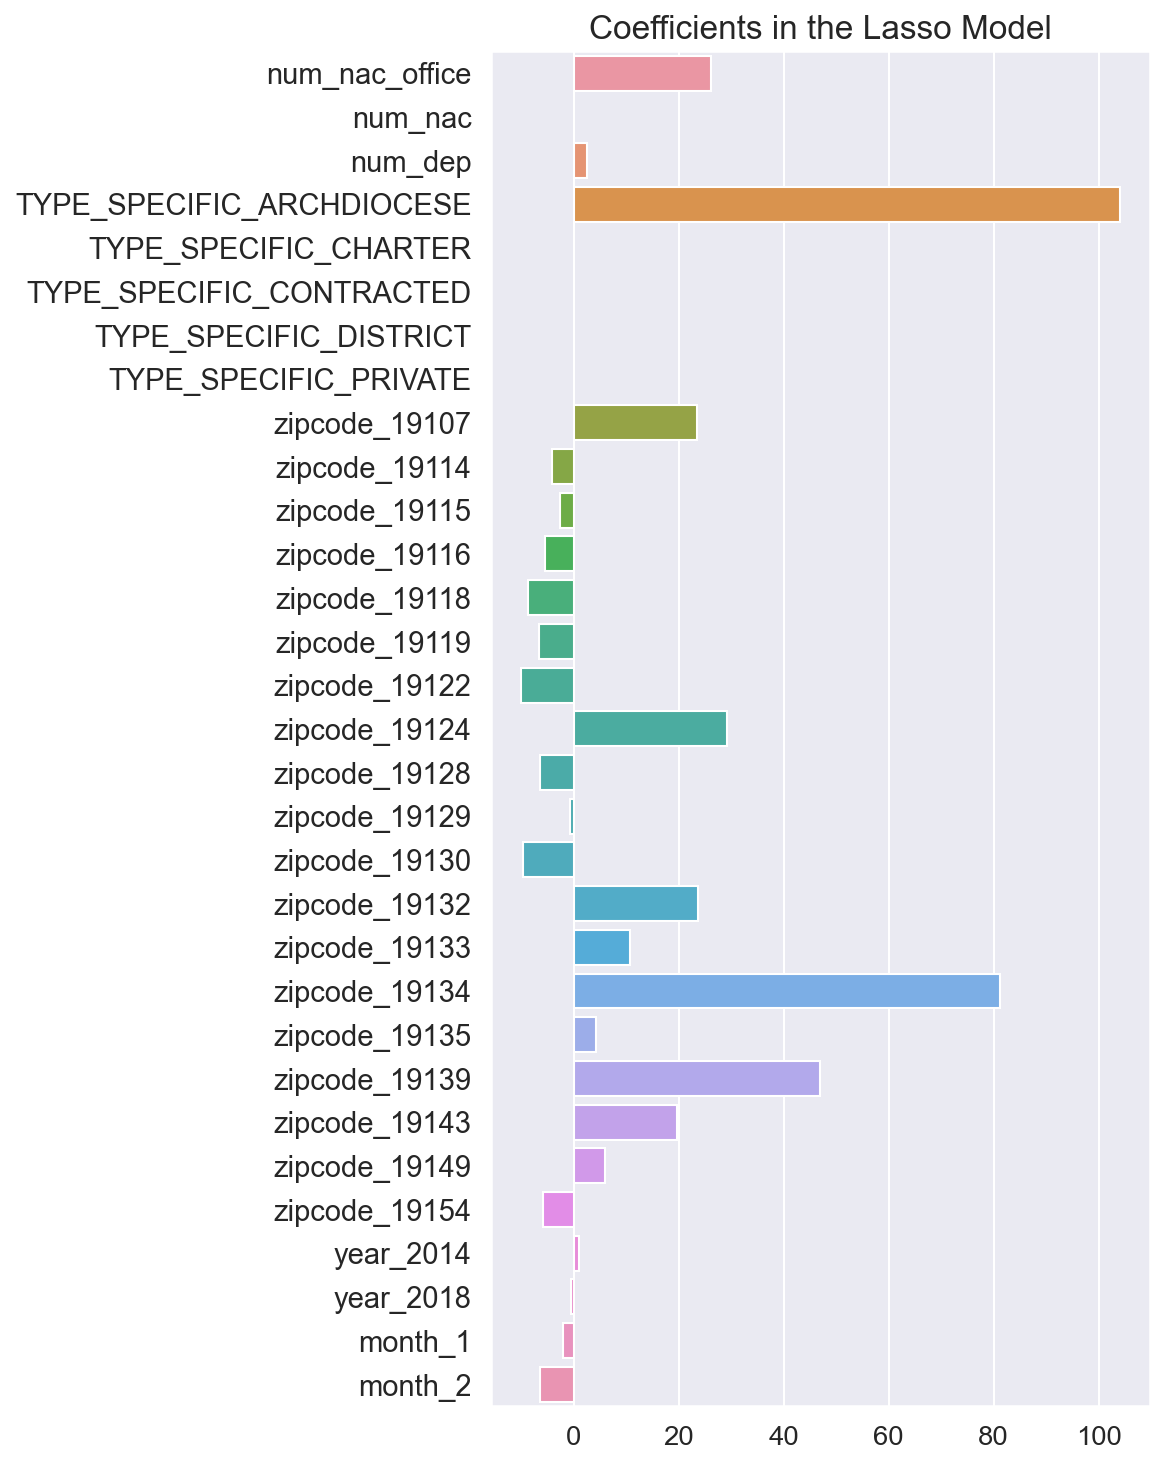

In [167]:
plt.figure(dpi=150,figsize=(8,10))
sns.set(font_scale=1.2) 

colnames = OutXs.columns[mask]
#colnames = [r'$\Delta\ SFMS [dex]$','$M_{h}/M_{*}$',
 #                r'$Q_{Bar,hcorr}$',r'$r_{opt}}$ [kpc]','D$_{3rd\ Gal}$ [Mpc]']
colnames = np.asarray(colnames)

ax = sns.barplot(x=orig_coef[mask], y=OutXs.columns[mask])
ax.set_yticklabels(colnames, fontsize=14)
plt.title("Coefficients in the Lasso Model",fontsize=16)
plt.tight_layout()

#plt.savefig('SFR_RATIO_DG16_BAR_COEFS_M*.png',bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In [135]:
list(OutXs.columns)

['num_art',
 'num_fm',
 'num_parks',
 'num_landmark',
 'num_housingcouncil',
 'num_nac_office',
 'num_nac',
 'num_pools',
 'num_spraygrounds',
 'num_playstreets',
 'num_playgrounds',
 'agi_code',
 'n_single_returns',
 'n_joint_returns',
 'num_dep',
 'agi',
 'total_wages',
 'salaries',
 'num_unemployment',
 'amt_unemployment',
 'num_tuition_tax',
 'amt_tuition_tax',
 'num_education_credit',
 'amt_education_credit',
 'TYPE_SPECIFIC_ARCHDIOCESE',
 'TYPE_SPECIFIC_CHARTER',
 'TYPE_SPECIFIC_CONTRACTED',
 'TYPE_SPECIFIC_DISTRICT',
 'TYPE_SPECIFIC_PRIVATE',
 'num_community_programs',
 'zipcode_19102',
 'zipcode_19103',
 'zipcode_19104',
 'zipcode_19106',
 'zipcode_19107',
 'zipcode_19109',
 'zipcode_19111',
 'zipcode_19112',
 'zipcode_19114',
 'zipcode_19115',
 'zipcode_19116',
 'zipcode_19118',
 'zipcode_19119',
 'zipcode_19120',
 'zipcode_19121',
 'zipcode_19122',
 'zipcode_19123',
 'zipcode_19124',
 'zipcode_19125',
 'zipcode_19126',
 'zipcode_19127',
 'zipcode_19128',
 'zipcode_19129',
 'z

In [169]:
df.TYPE_SPECIFIC_ARCHDIOCESE

96        2.0
97        2.0
98        2.0
99        2.0
100       2.0
         ... 
22554    11.0
22555    11.0
22556    11.0
22557    11.0
22558    11.0
Name: TYPE_SPECIFIC_ARCHDIOCESE, Length: 16776, dtype: float64